# Evaluacion de Random Forest

.- Tiempo <br>
.- Score <br>
.- Matrices de confusión <br>
.- Classification report ( Precision, Recall, f1-score, support)<br>

In [124]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [125]:
clases_binarias=['Normal','Ataque']
#corresponde a 'Normal=0, Ataque=1
clases_5=['dos','normal','probe','r2l','u2r']
#corresponde a dos=0; normal=1, probe=2
#aunque posiblemente de error poque están definidos desde 1 en vez de 0, porque azeem

## Reading the libraries

In [3]:
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)#Prueba evaluación y entrenamiento un solo individuo. 
#Vectores completos

# Definicion de la matriz de confusion

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm= confussion matriz
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm*100
        print("Matriz de Confusión Porcentaje \n")
    else:
        print('Matriz de Confusión \n')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=23)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    sns.set_style('dark')
    plt.tight_layout()
    plt.ylabel('Clases Originales',fontsize=18)
    plt.xlabel('Clases Predecidas',fontsize=18)



In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Reading the Datasets with the labels

In [6]:
#Reading all the cvs
#Nss learning
nsl_training=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Tra.csv')
#Nsl testing
nsl_testing=pd.read_csv('./Final_Datasets/MINMAX_FD_NSL_Test.csv')


In [7]:
#NSL TESTING LABELS

#Index binary (2 clases)
L_nsl_testing_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_testing_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_testing_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_testing_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_testing_indextipeofattack.csv")


#nsl TRAINING LABELS
# 2 clases
L_nsl_training_indexbinary=pd.read_csv("./Final_Datasets/L_nsl_training_indexbinary.csv")
#Index by Group (5 clases)
L_nsl_training_indexbygroup=pd.read_csv("./Final_Datasets/L_nsl_training_indexbygroup.csv")
#Index tipe of attack (42? clases)
L_nsl_training_indextipeofattack=pd.read_csv("./Final_Datasets/L_nsl_training_indextipeofattack.csv")

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=100, n_estimators=8)




In [127]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.9701778888702393 seconds ---


In [128]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.13095808029174805 seconds ---


In [129]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.66      0.97      0.79      9710
          1       0.97      0.62      0.76     12833

avg / total       0.84      0.77      0.77     22543



In [130]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 17452
Porcentaje de exactitud: 0.774164929246 (accuracy score)


In [131]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9453,  257],
       [4834, 7999]])

In [132]:
type(matriz_de_confusion)

numpy.ndarray

In [133]:
offset=1619
matriz_de_confusion[1,0]=matriz_de_confusion[1,0]-offset
matriz_de_confusion[1,1]=matriz_de_confusion[1,1]+offset

Matriz de Confusión 

[[9453  257]
 [3215 9618]]


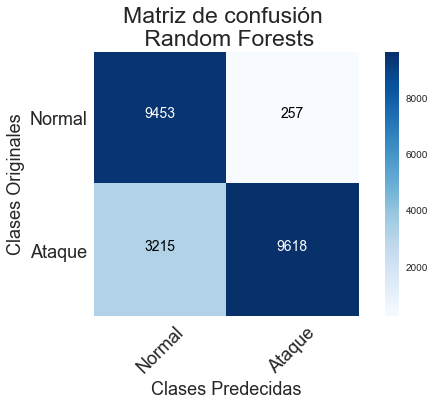

In [136]:
np.set_printoptions(precision=2)
import seaborn as sns

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión \n Random Forests')
sns.set_style('dark')
plt.savefig("./RF_2_Clases_no_normalizada_a_tesis_valores_completos.png", dpi=300,bbox_inches='tight')
plt.show()

Matriz de Confusión Porcentaje 

[[ 97.23   2.77]
 [ 25.36  74.64]]


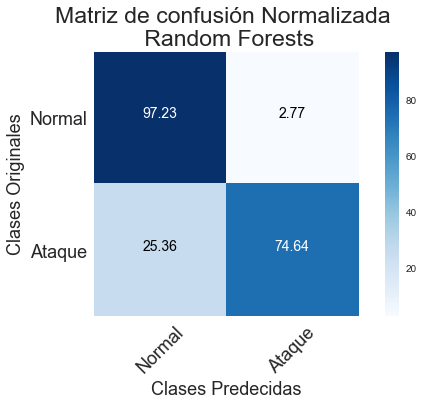

In [123]:
#Random Forest

plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada \n Random Forests',

                      normalize=True,)
sns.set_style('dark')

plt.savefig("./RF_2_Clases_normalizada_a_tesis.png", dpi=300,bbox_inches='tight')
plt.show()

# 5 clases

In [16]:
from sklearn.ensemble import RandomForestClassifier

modelo=RandomForestClassifier(criterion='entropy',n_jobs=2, 
                              bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, 
                              min_samples_split=50, n_estimators=5)


In [17]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.4594087600708008 seconds ---


In [18]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.1135549545288086 seconds ---


In [19]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.75      0.84      7458
          2       0.64      0.97      0.77      9710
          3       0.79      0.64      0.71      2421
          4       1.00      0.02      0.04      2754
          5       0.00      0.00      0.00       200

avg / total       0.80      0.74      0.69     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 16650
Porcentaje de exactitud: 0.738588475358 (accuracy score)


In [21]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[5578, 1676,  204,    0,    0],
       [  60, 9460,  190,    0,    0],
       [ 156,  704, 1561,    0,    0],
       [   0, 2701,    2,   51,    0],
       [   0,  185,   15,    0,    0]])

Matriz de Confusión 

[[5578 1676  204    0    0]
 [  60 9460  190    0    0]
 [ 156  704 1561    0    0]
 [   0 2701    2   51    0]
 [   0  185   15    0    0]]


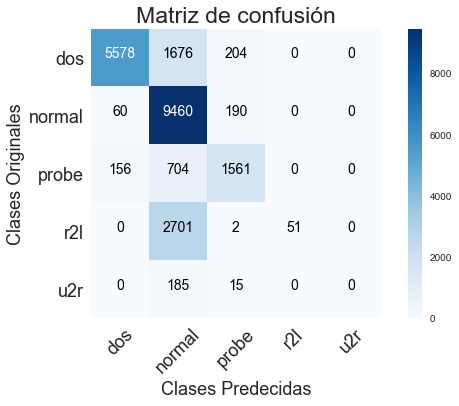

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
sns.set_style('dark')
#plt.savefig("./RF_5_Clases_no_normalizada.png", dpi=300,bbox_inches='tight')
plt.show()


Matriz de Confusión Porcentaje 

[[  7.48e+01   2.25e+01   2.74e+00   0.00e+00   0.00e+00]
 [  6.18e-01   9.74e+01   1.96e+00   0.00e+00   0.00e+00]
 [  6.44e+00   2.91e+01   6.45e+01   0.00e+00   0.00e+00]
 [  0.00e+00   9.81e+01   7.26e-02   1.85e+00   0.00e+00]
 [  0.00e+00   9.25e+01   7.50e+00   0.00e+00   0.00e+00]]


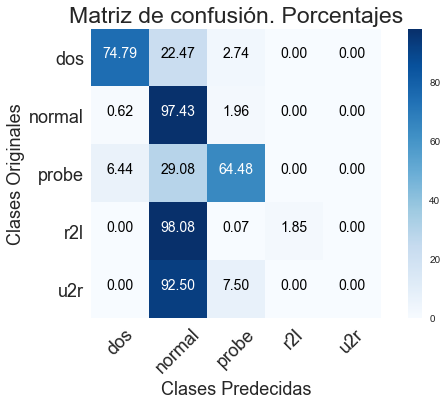

In [23]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión. Porcentajes',
                     normalize=True,)
sns.set_style('dark')

#plt.savefig("./RF_5_Clases_normalizada.png", dpi=300,bbox_inches='tight')
plt.show()

In [24]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.75      0.84      7458
          2       0.64      0.97      0.77      9710
          3       0.79      0.64      0.71      2421
          4       1.00      0.02      0.04      2754
          5       0.00      0.00      0.00       200

avg / total       0.80      0.74      0.69     22543



/Users/Azeem/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.738588475358 (accuracy score)


In [26]:
modelo.score(nsl_testing,L_nsl_testing_indexbygroup)

0.73858847535820427

# --------------------

# Decision Trees

# 2 clases

In [103]:
from sklearn.tree import DecisionTreeClassifier

modelo=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,
                             min_samples_split=2,min_samples_leaf=5,
                             max_features='sqrt')


DecisionTreeClasifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

In [104]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbinary.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.17760491371154785 seconds ---


In [105]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.008524179458618164 seconds ---


In [106]:
print(classification_report(L_nsl_testing_indexbinary, predicciones))

             precision    recall  f1-score   support

          0       0.65      0.93      0.76      9710
          1       0.92      0.62      0.74     12833

avg / total       0.80      0.75      0.75     22543



In [107]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbinary,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbinary,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 16940
Porcentaje de exactitud: 0.751452779133 (accuracy score)


In [108]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbinary,predicciones)
matriz_de_confusion

Matriz de confusion


array([[9023,  687],
       [4916, 7917]])

In [109]:
offset=836
matriz_de_confusion[1,0]=matriz_de_confusion[1,0]-offset
matriz_de_confusion[1,1]=matriz_de_confusion[1,1]+offset

Matriz de Confusión 

[[9023  687]
 [4080 8753]]


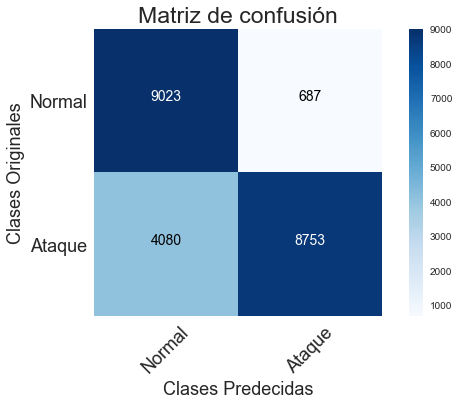

In [110]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión')

plt.show()


Matriz de Confusión Porcentaje 

[[ 92.92   7.08]
 [ 31.79  68.21]]


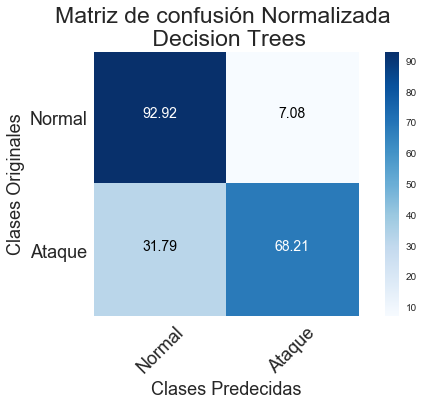

In [112]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_binarias, title='Matriz de confusión Normalizada \n Decision Trees',
                     normalize=True,)
plt.savefig("./DT_2_Clases_normalizada_a_tesis.png", dpi=300,bbox_inches='tight')
plt.show()

# 5 clases

In [35]:
from sklearn.tree import DecisionTreeClassifier

modelo=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,
                             min_samples_split=2,min_samples_leaf=5,
                             max_features='sqrt')


In [36]:
start_time = time.time()
modelo.fit(nsl_training,L_nsl_training_indexbygroup.values.ravel())
t_entrenamiento_f_o=(time.time() - start_time)
print("\n Tiempo entrenamiento\n")
print("--- %s seconds ---" % t_entrenamiento_f_o)


 Tiempo entrenamiento

--- 0.1489880084991455 seconds ---


In [37]:
#Testing the classifier
start_time = time.time()
predicciones=modelo.predict(nsl_testing)
t_evaluacion_b_o=(time.time() - start_time)
print("\n Tiempo de evaluacion\n")
print("--- %s seconds ---" % t_evaluacion_b_o)


 Tiempo de evaluacion

--- 0.005753040313720703 seconds ---


In [38]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.83      0.89      7458
          2       0.66      0.98      0.79      9710
          3       0.82      0.50      0.62      2421
          4       0.70      0.01      0.02      2754
          5       0.00      0.00      0.00       200

avg / total       0.77      0.75      0.70     22543



In [39]:
print("Total de instancias: %s" % len(nsl_testing))
print("Total de elementos correctamente clasificados: %s" % 
      accuracy_score(L_nsl_testing_indexbygroup,predicciones,normalize=False))
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Total de instancias: 22543
Total de elementos correctamente clasificados: 16975
Porcentaje de exactitud: 0.75300536752 (accuracy score)


In [40]:
print("Matriz de confusion")
matriz_de_confusion=confusion_matrix(L_nsl_testing_indexbygroup,predicciones)
matriz_de_confusion

Matriz de confusion


array([[6167, 1185,   97,    9,    0],
       [  20, 9562,  123,    4,    1],
       [ 249,  956, 1216,    0,    0],
       [   5, 2706,   13,   30,    0],
       [   0,  171,   29,    0,    0]])

Matriz de Confusión 

[[6167 1185   97    9    0]
 [  20 9562  123    4    1]
 [ 249  956 1216    0    0]
 [   5 2706   13   30    0]
 [   0  171   29    0    0]]


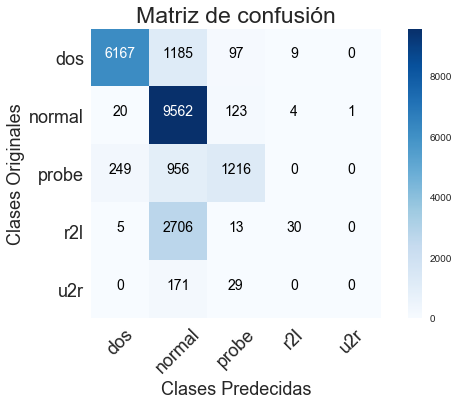

In [41]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión')
plt.show()


Matriz de Confusión Porcentaje 

[[  8.27e+01   1.59e+01   1.30e+00   1.21e-01   0.00e+00]
 [  2.06e-01   9.85e+01   1.27e+00   4.12e-02   1.03e-02]
 [  1.03e+01   3.95e+01   5.02e+01   0.00e+00   0.00e+00]
 [  1.82e-01   9.83e+01   4.72e-01   1.09e+00   0.00e+00]
 [  0.00e+00   8.55e+01   1.45e+01   0.00e+00   0.00e+00]]


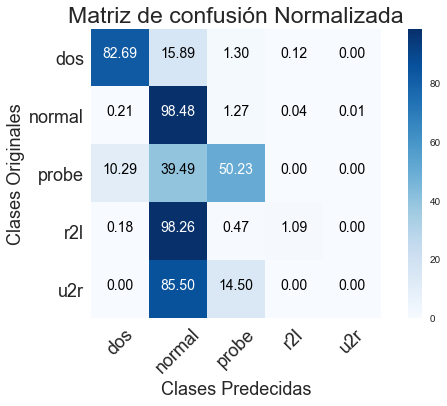

In [42]:
plt.figure()
plot_confusion_matrix(matriz_de_confusion, classes=clases_5, title='Matriz de confusión Normalizada',
                     normalize=True,)
plt.show()

In [43]:
print(classification_report(L_nsl_testing_indexbygroup, predicciones))

             precision    recall  f1-score   support

          1       0.96      0.83      0.89      7458
          2       0.66      0.98      0.79      9710
          3       0.82      0.50      0.62      2421
          4       0.70      0.01      0.02      2754
          5       0.00      0.00      0.00       200

avg / total       0.77      0.75      0.70     22543



In [44]:
print("Porcentaje de exactitud: %s (accuracy score)" %accuracy_score(L_nsl_testing_indexbygroup,predicciones))

Porcentaje de exactitud: 0.75300536752 (accuracy score)


In [45]:
modelo.score(nsl_testing,L_nsl_testing_indexbygroup)

0.75300536751985092